In [59]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('belle2')
import numpy as np
import pdg
import uproot
import pandas as pd

treefile='../Ntuples/MC_e_50k.root'
with uproot.open(treefile)['B0'] as file:
    df = pd.DataFrame(file.arrays(library="np"))

df['B0_mcPDG'] = df['B0_mcPDG'].fillna(0)
df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
df.eval('p_D_l = D_CMS_p + e_CMS_p', inplace=True)
df.eval('e_pSig = (e_mcP-e_p) / e_pErr', inplace=True)
df_bestSelected=df.loc[df.groupby('__event__').B_D_ReChi2.idxmin()]

df1 = df.query('nElectrons90 + nMuons90 ==1')

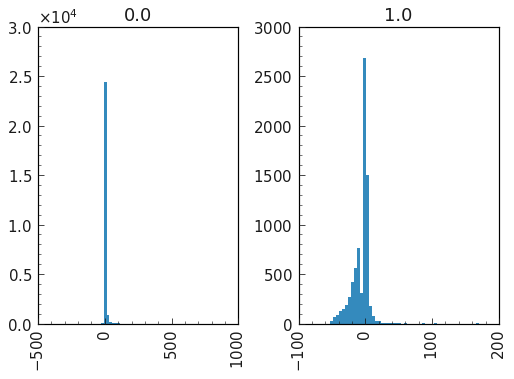

In [54]:
df.hist('e_pSig',bins=50,by='e_isBremsCorrected');

In [ ]:
df.hist('e_pSig',bins=50,by='e_isBremsCorrected');
# plt.figure(figsize=(100,50))
# plt.title('e channel')
# plt.ylabel('# Event per bin')
# plt.xlabel('e_pSig = (mcP - p) / pErr');

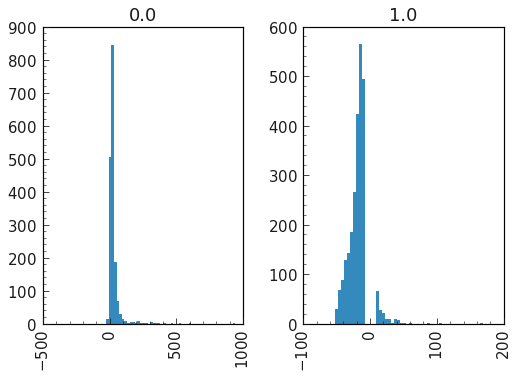

In [55]:
df.query('1000>abs(e_pSig)>10').hist('e_pSig',bins=50,by='e_isBremsCorrected');

In [ ]:
df.query('1000>abs(e_pSig)>10').hist('e_pSig',bins=50,by='e_isBremsCorrected');
# plt.title('e channel')
# plt.ylabel('# Event per bin')
# plt.xlabel('e_pSig = (mcP - p) / pErr');

In [ ]:
df1[['Ecms','nElectrons90','nMuons90','ROEeidBDT','ROEmuidBDT']][30:40]

In [8]:
df_check=df[df['B0_mcPDG']!=df['e_genMotherPDG']]
df_check.query('0<B0_mcPDG<300553')[['B0_mcPDG','e_genMotherPDG','e_mcPDG','D_mcPDG']]

,B0_mcPDG,e_genMotherPDG,e_mcPDG,D_mcPDG
3000,511.0,111.0,-11.0,-411.0


### Final Cuts and Best Candidate Selection

In [2]:
#df_cut=df.query('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5 and \
#                B0_roeCharge_my_mask==0 and 0<=B0_vetoeID<0.9 and 0<=B0_vetomuID<0.9 and B0_R2<0.3').copy()
df_cut=df.query('B0_roeMbc_my_mask>0').copy()
df_bestSelected=df_cut.loc[df_cut.groupby('__event__').B_D_ReChi2.idxmin()]
#df_bestSelected['__ncandidates__']=df_bestSelected.groupby('__event__').transform(len)

In [11]:
# B decay
B_meson='B0_mcPDG==511 or B0_mcPDG==-511 or B0_mcPDG==521 or B0_mcPDG==-521'
tau_modes = 'DecayMode=="D_tau_nu" or DecayMode=="Dst_tau_nu" or DecayMode=="Dstst_tau_nu"'
e_modes = 'DecayMode=="D_e_nu" or DecayMode=="Dst_e_nu" or DecayMode=="Dstst_e_nu"'
mu_modes = 'DecayMode=="D_mu_nu" or DecayMode=="Dst_mu_nu" or DecayMode=="Dstst_mu_nu"'
bkg_misIdAndTwoD = 'DecayMode=="bkg"'
# Not B decay
bkg_combinatorial_oneBsignal = 'B0_mcPDG==300553 and DecayMode!="bkg"'
bkg_combinatorial_noBsignal = 'B0_mcPDG==300553 and DecayMode=="bkg"'
bkg_BDaughterDecay = 'B0_mcPDG!=511 and B0_mcPDG!=-511 and B0_mcPDG!=521 and B0_mcPDG!=-521 \
and B0_mcPDG!=300553 and B0_mcPDG!=0 and B0_isContinuumEvent!=1'
bkg_misId2='B0_mcPDG==0'
bkg_continuum = 'B0_isContinuumEvent==1'

df_B_mother = df_bestSelected.query(B_meson)
df_tau = df_B_mother.query(tau_modes)
df_e = df_B_mother.query(e_modes)
df_mu = df_B_mother.query(mu_modes)
df_bkg_misIdAndTwoD = df_B_mother.query(bkg_misIdAndTwoD)
# Not B decay
df_bkg_comb_oneBsignal = df_bestSelected.query(bkg_combinatorial_oneBsignal)
df_bkg_comb_noBsignal = df_bestSelected.query(bkg_combinatorial_noBsignal)
df_bkg_BDaughterDecay = df_bestSelected.query(bkg_BDaughterDecay)
df_bkg_misId2 = df_bestSelected.query(bkg_misId2)
df_bkg_continuum = df_bestSelected.query(bkg_continuum)

D_e_nu=df_e.query('DecayMode=="D_e_nu"')
D_mu_nu=df_mu.query('DecayMode=="D_mu_nu"')
D_tau_nu=df_tau.query('DecayMode=="D_tau_nu"')
Dst_e_nu=df_e.query('DecayMode=="Dst_e_nu"')
Dst_mu_nu=df_mu.query('DecayMode=="Dst_mu_nu"')
Dst_tau_nu=df_tau.query('DecayMode=="Dst_tau_nu"')
Dstst_e_nu=df_e.query('DecayMode=="Dstst_e_nu"')
Dstst_mu_nu=df_mu.query('DecayMode=="Dstst_mu_nu"')
Dstst_tau_nu=df_tau.query('DecayMode=="Dstst_tau_nu"')

In [12]:
def statistics(df):
    counts=df.count()
    mean=df.mean()
    std=df.std()
    return f'''counts = %d \nmean = %5.3f \nstd = %5.3f''' %(counts,mean,std)

kwarg={'bins':25, 'histtype':'step','lw':2}

def plot_components(variable):
    D_tau_nu[variable].hist(bins=25,label=f'tau \n{statistics(D_tau_nu[variable])}')
    D_e_nu[variable].hist(label=f'e \n{statistics(D_e_nu[variable])}',**kwarg)
    df_mu[variable].hist(label=f'mu \n{statistics(df_mu[variable])}',**kwarg)
    df_bkg_misIdAndTwoD[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD[variable])}',**kwarg)
    df_bkg_comb_oneBsignal[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal[variable])}',**kwarg)
    df_bkg_comb_noBsignal[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal[variable])}',**kwarg)
    df_bkg_BDaughterDecay[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay[variable])}',**kwarg)
    df_bkg_misId2[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2[variable])}',**kwarg)
    df_bkg_continuum[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_components_withcut(cut,variable):
    D_tau_nu.query(cut)[variable].hist(bins=25,label=f'tau \n{statistics(D_tau_nu.query(cut)[variable])}')
    D_e_nu.query(cut)[variable].hist(label=f'e \n{statistics(D_e_nu.query(cut)[variable])}',**kwarg)
    df_mu.query(cut)[variable].hist(label=f'mu \n{statistics(df_mu.query(cut)[variable])}',**kwarg)
    df_bkg_misIdAndTwoD.query(cut)[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD.query(cut)[variable])}',**kwarg)
    df_bkg_comb_oneBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_comb_noBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_BDaughterDecay.query(cut)[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay.query(cut)[variable])}',**kwarg)
    df_bkg_misId2.query(cut)[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2.query(cut)[variable])}',**kwarg)
    df_bkg_continuum.query(cut)[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum.query(cut)[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_signal(variable):
    D_tau_nu[variable].hist(bins=25,label=f'D_tau_nu \n{statistics(D_tau_nu[variable])}')
    Dst_tau_nu[variable].hist(label=f'Dst_tau_nu \n{statistics(Dst_tau_nu[variable])}',**kwarg)
    Dstst_tau_nu[variable].hist(label=f'Dstst_tau_nu \n{statistics(Dstst_tau_nu[variable])}',**kwarg)
    D_e_nu[variable].hist(label=f'D_e_nu \n{statistics(D_e_nu[variable])}',**kwarg)
    Dst_e_nu[variable].hist(label=f'Dst_e_nu \n{statistics(Dst_e_nu[variable])}',**kwarg)
    Dstst_e_nu[variable].hist(label=f'Dstst_e_nu \n{statistics(Dstst_e_nu[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=2, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_projection(cut,variable):
    D_tau_nu.query(cut)[variable].hist(bins=25,label=f'D_tau_nu \n{statistics(D_tau_nu.query(cut)[variable])}')
    D_e_nu.query(cut)[variable].hist(label=f'D_e_nu \n{statistics(D_e_nu.query(cut)[variable])}',**kwarg)
#    Dst_e_nu.query(cut)[variable].hist(label=f'Dst_e_nu \n{statistics(Dst_e_nu.query(cut)[variable])}',**kwarg)
#    df_bkg_misIdAndTwoD.query(cut)[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD.query(cut)[variable])}',**kwarg)
    df_bkg_comb_oneBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_comb_noBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal.query(cut)[variable])}',**kwarg)
#    df_bkg_BDaughterDecay.query(cut)[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay.query(cut)[variable])}',**kwarg)
    df_bkg_misId2.query(cut)[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2.query(cut)[variable])}',**kwarg)
#    df_bkg_continuum.query(cut)[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum.query(cut)[variable])}',**kwarg)
#    Dst_tau_nu.query(cut)[variable].hist(label=f'Dst_tau_nu \n{statistics(Dst_tau_nu.query(cut)[variable])}',**kwarg)
#    Dstst_e_nu.query(cut)[variable].hist(label=f'Dstst_e_nu \n{statistics(Dstst_e_nu.query(cut)[variable])}',**kwarg)
#    Dstst_tau_nu.query(cut)[variable].hist(label=f'Dstst_tau_nu \n{statistics(Dstst_tau_nu.query(cut)[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=2, fancybox=True, shadow=True,labelspacing=1.5)

In [25]:
def plot_ROE(cut,variable1,variable2,variable3):
    
    kwargs={'bins':50, 'histtype':'step', 'linewidth':2}
    fig,axs =plt.subplots(1,3,figsize=(16,5))
    fig.suptitle('Signal MC $B_{sig}\\rightarrow De \\nu;\ B_{tag}\ (generic)$ with'+f' {cut} [truth mask]')
    #fig.supxlabel(f'{variable}')
    fig.supylabel('# of candidates per bin',x=0.06)
    #D_e_nu.query(cut)[variable].hist(label=f'D_e_nu \n{statistics(D_e_nu.query(cut)[variable])}',**kwarg)
    #axs[0].set_title(f'FWD')
    axs[0].hist(D_e_nu.query(cut)[variable1],label=f'D_e_nu \n{statistics(D_e_nu.query(cut)[variable1])}', **kwargs)
    axs[0].set_xlabel(f'{variable1}')
    #axs[1].set_title(f'BRL')
    axs[1].hist(D_e_nu.query(cut)[variable2],label=f'D_e_nu \n{statistics(D_e_nu.query(cut)[variable2])}', **kwargs)
    axs[1].set_xlabel(f'{variable2}')
    #axs[2].set_title(f'BWD')
    axs[2].hist(D_e_nu.query(cut)[variable3],label=f'D_e_nu \n{statistics(D_e_nu.query(cut)[variable3])}', **kwargs)
    axs[2].set_xlabel(f'{variable3}')
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    #axs[2].set_xlim(4.9,5.3)
    #plt.setp(axs, xlim=xlimit)
    #axs[0].legend(bbox_to_anchor=(1.5,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)

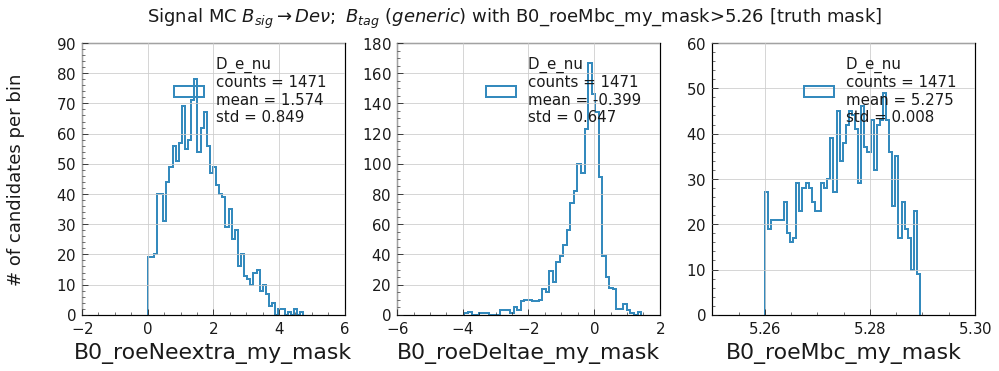

In [6]:
plot_ROE('B0_roeMbc_my_mask>5.26','B0_roeNeextra_my_mask','B0_roeDeltae_my_mask','B0_roeMbc_my_mask')

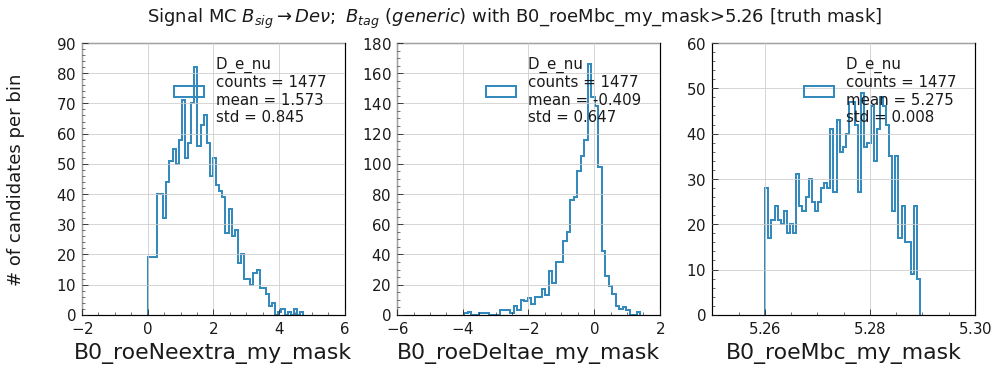

In [14]:
plot_ROE('B0_roeMbc_my_mask>5.26','B0_roeNeextra_my_mask','B0_roeDeltae_my_mask','B0_roeMbc_my_mask')

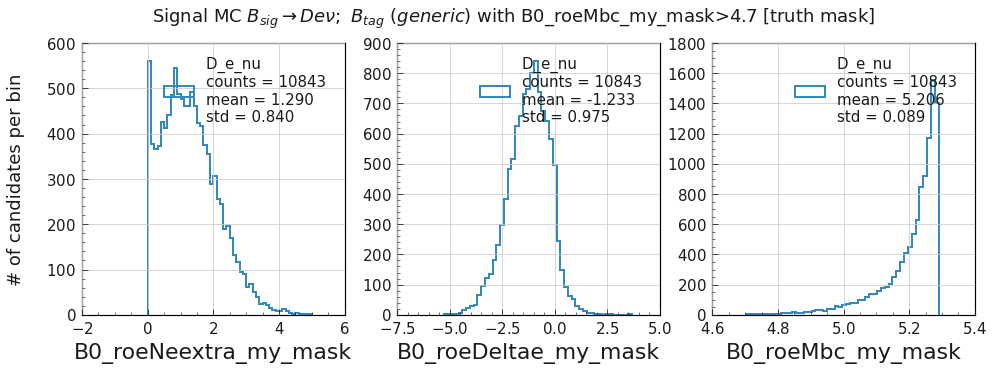

In [26]:
plot_ROE('B0_roeMbc_my_mask>4.7','B0_roeNeextra_my_mask','B0_roeDeltae_my_mask','B0_roeMbc_my_mask')

Text(0.5, 1.0, '$B_{sig}\\rightarrow De \\nu$ ROE(generic) roeNeextra [isSignal==1]')

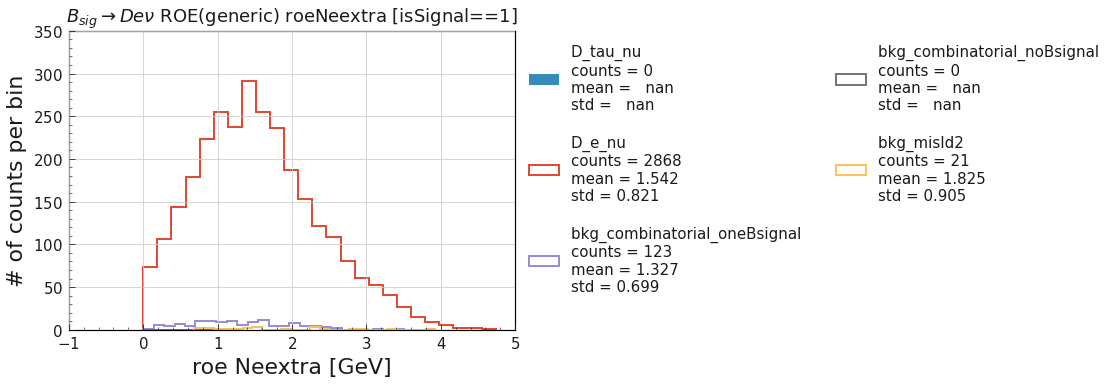

In [16]:
plot_projection('B0_roeMbc_my_mask>5.26', 'B0_roeNeextra_my_mask')
plt.xlabel("roe Neextra [GeV]")
plt.ylabel('# of counts per bin')
plt.title('$B_{sig}\\rightarrow De \\nu$ ROE(generic) roeNeextra [isSignal==1]')

In [ ]:
df_cut=df_pi_signal.query('isCurl==1')
plt.title('Signal MC ROE tracks')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,50),(-25,25)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()
plt.xlabel('dr [cm]')
plt.ylabel('dz [cm]')

In [ ]:
name_list = [r'$D\tau_e\nu$',r'$D*\tau_e\nu$',r'$D**\tau_e\nu$',
             r'$De\nu$',r'$D*e\nu$',r'$D**e\nu$',
             'bkg_misIdAndTwoD','bkg_combinatorial','bkg_randomComb']
df_list = [D_tau_nu,Dst_tau_nu,Dstst_tau_nu, 
           D_e_nu,Dst_e_nu,Dstst_e_nu, 
           df_bkg_misIdAndTwoD,df_bkg_comb_oneBsignal,df_bkg_comb_noBsignal]

df_dict = dict(zip(name_list, df_list))

cuts='B0_roeMbc_my_mask>5.26'

n_rows,n_cols = [3,3]
fig,ax=plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16,8),sharex=True, sharey='all')
k=0
for j in range(n_cols):
    for i in range(n_rows):
        ax[i,j].set_title=name_list[k]
        ax[i,j].hist2d(df_dict[name_list[k]].query(cuts).p_D_l, df_dict[name_list[k]].query(cuts).MM2,
                       range=[[0,5],[-4,11]],bins=25,cmap='jet',norm=colors.LogNorm())
        k+=1
plt.xlabel('$p_l + p_D}$')
plt.ylabel('withROE ${m_{missing}}^2$')

Text(0, 0.5, 'withROE ${m_{missing}}^2$')

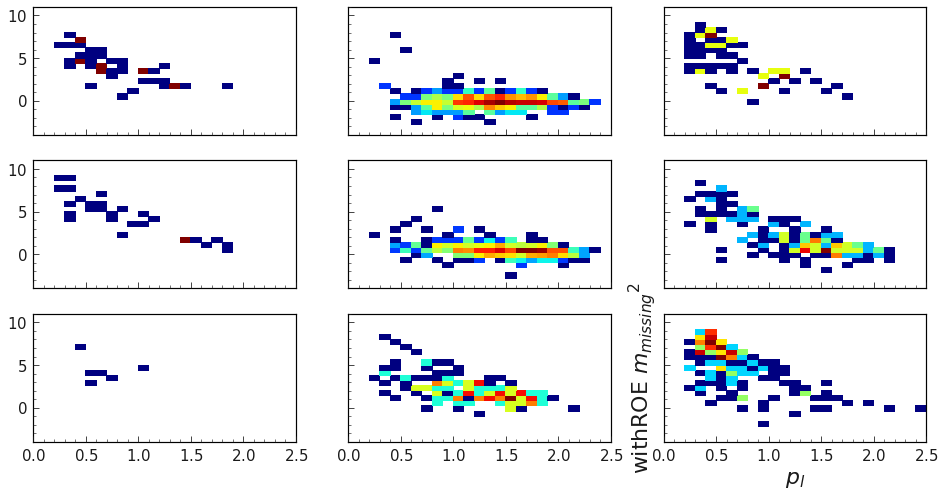

In [22]:
name_list = [r'$D\tau_e\nu$',r'$D*\tau_e\nu$',r'$D**\tau_e\nu$',
             r'$De\nu$',r'$D*e\nu$',r'$D**e\nu$',
             'bkg_misIdAndTwoD','bkg_combinatorial','bkg_randomComb']
df_list = [D_tau_nu,Dst_tau_nu,Dstst_tau_nu, 
           D_e_nu,Dst_e_nu,Dstst_e_nu, 
           df_bkg_misIdAndTwoD,df_bkg_comb,df_bkg_randomComb]

df_dict = dict(zip(name_list, df_list))

cuts='B0_roeMbc_my_mask>5.25 and abs(B0_roeDeltae_my_mask)<0.5'

n_rows,n_cols = [3,3]
fig,ax=plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16,8),sharex=True, sharey='all')
k=0
for j in range(n_cols):
    for i in range(n_rows):
        ax[i,j].set_title=name_list[k]
        ax[i,j].hist2d(df_dict[name_list[k]].query(cuts).e_CMS_p, df_dict[name_list[k]].query(cuts).MM2,
                       range=[[0,2.5],[-4,11]],bins=25,cmap='jet',norm=colors.LogNorm())
        k+=1
plt.xlabel('$p_l$')
plt.ylabel('withROE ${m_{missing}}^2$')

In [2]:
np.reshape(df.columns,(1,375))

array([['__experiment__', '__run__', '__event__', '__candidate__',
        '__ncandidates__', '__weight__', 'Ecms', 'IPX', 'IPY', 'IPZ',
        'missingMomentumOfEvent', 'missingMomentumOfEvent_Px',
        'missingMomentumOfEvent_Py', 'missingMomentumOfEvent_Pz',
        'missingMomentumOfEvent_theta', 'missingMomentumOfEventCMS',
        'missingMomentumOfEventCMS_Px', 'missingMomentumOfEventCMS_Py',
        'missingMomentumOfEventCMS_Pz',
        'missingMomentumOfEventCMS_theta', 'missingEnergyOfEventCMS',
        'missingMass2OfEvent', 'visibleEnergyOfEventCMS',
        'totalPhotonsEnergyOfEvent', 'B0_CMS_px', 'B0_CMS_py',
        'B0_CMS_pz', 'B0_CMS_pt', 'B0_CMS_p', 'B0_CMS_E', 'B0_Mbc',
        'B0_deltaE', 'B0_M', 'B0_ErrM', 'B0_SigM', 'B0_InvM',
        'B0_isSignal', 'B0_mcErrors', 'B0_mcPDG', 'B0_dM', 'B0_Q',
        'B0_dQ', 'B0_missingMass2OfEvent', 'B0_m2Recoil', 'B0_cos_pV',
        'B0_cos_pB', 'B0_vtxReChi2', 'B0_vtxNDF', 'B0_vtxDD',
        'B0_vtxDDSig', 'B0_Decay

## 1. $De$

## 7. Missing Mass^2

In [21]:
def naive_mm2(data):
    # Energy and nominal mass
    E_B = df_event.Ecms.mean() / 2
    E_Dl = data.D_CMS_E + data.e_CMS_E
    M_B = pdg.get('anti-B0').Mass()
    Mbc = data.B0_Mbc
    # 3 momentum
    p_Dl_x = data.D_CMS_px + data.e_CMS_px
    p_Dl_y = data.D_CMS_py + data.e_CMS_py
    p_Dl_z = data.D_CMS_pz + data.e_CMS_pz
    # Calculating intermediate quantities
    p_Dl2 = p_Dl_x**2 + p_Dl_y**2 + p_Dl_z**2
    p_Dl = np.sqrt(p_Dl2)
    p_B = np.sqrt(E_B**2 - M_B**2)
    m_Dl2 = E_Dl**2 - p_Dl2
    # Calculating the final quantities
    naive_missing_m2 = Mbc**2 + m_Dl2 - 2*E_B*E_Dl
    cos_theta_BY = -naive_missing_m2 / (2*p_B*p_Dl)
    return {'mm2': naive_missing_m2, 'cos': cos_theta_BY}

In [22]:
# MM2 with ROE = (E_Y4S/2 - E_D - E_l)^2 - (p_cm - p_roe - p_D - p_l)^2
# Use ROE information p_roe only, E_roe has bad resolution and is unnecessary
# Note that p are 3 momenta vectors and p_cm is 0 (center of momentum frame)
def withROE_mm2_1(data):
    # Energy
    E_B = df_event.Ecms.mean()/2
    E_Dl = data.D_CMS_E + data.e_CMS_E
    E_miss = E_B - E_Dl
#    M_B = pdg.get('anti-B0').Mass()
    # 3 momentum
    p_x = data.B0_CMS_roePx_my_mask + data.D_CMS_px + data.e_CMS_px
    p_y = data.B0_CMS_roePy_my_mask + data.D_CMS_py + data.e_CMS_py
    p_z = data.B0_CMS_roePz_my_mask + data.D_CMS_pz + data.e_CMS_pz
    # Calculating intermediate quantities
    p_miss2 = p_x**2 + p_y**2 + p_z**2
    # Calculating the final quantities
    withROE_missing_m2 = E_miss**2 - p_miss2
    cos_theta_BY = 0
    return {'mm2': withROE_missing_m2, 'cos': cos_theta_BY}

In [12]:
# MM2 with ROE = Mbc_roe^2 + M_Y^2 - 2*E_Beam*E_Y - 2*(p_roe dot p_Y)
# Use ROE information p_roe only, E_roe has bad resolution and is unnecessary
# Note that p are 3 momenta vectors and p_cm is 0 (center of momentum frame)
def withROE_mm2_2(data):
    # Energy
    E_B = df_event.Ecms.mean()/2
    E_Y = data.D_CMS_E + data.e_CMS_E
    M_B = pdg.get('anti-B0').Mass()
    Mbc_roe = data.B0_roeMbc_my_mask
    # Calculating M_Y^2
    p_Yx = data.D_CMS_px + data.e_CMS_px
    p_Yy = data.D_CMS_py + data.e_CMS_py
    p_Yz = data.D_CMS_pz + data.e_CMS_pz
    p_Y2 = p_Yx**2 + p_Yy**2 + p_Yz**2
    m_Y2 = E_Y**2 - p_Y2
    # dot product
    p_xdot = data.B0_CMS_roePx_my_mask * p_Yx
    p_ydot = data.B0_CMS_roePy_my_mask * p_Yy
    p_zdot = data.B0_CMS_roePz_my_mask * p_Yz
    p_dot = p_xdot + p_ydot + p_zdot
    # Calculating the final quantities
    withROE_missing_m2 = M_B**2 + m_Y2 - 2*E_B*E_Y - 2*p_dot
    cos_theta_BY = 0
    return {'mm2': withROE_missing_m2, 'cos': cos_theta_BY}

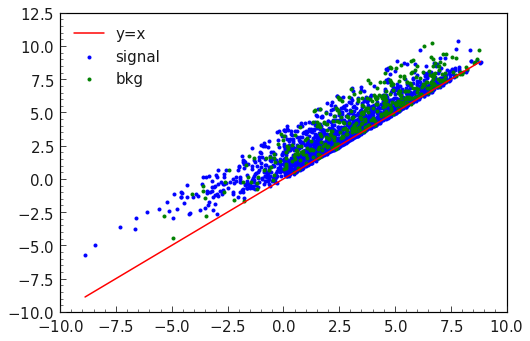

In [27]:
variable='mm2'
sig_mm2_1=withROE_mm2_1(df_bestSelected.query(sig))[variable]
bkg_mm2_1=withROE_mm2_1(df_bestSelected.query(bkg))[variable]
sig_mm2_2=withROE_mm2_2(df_bestSelected.query(sig))[variable]
bkg_mm2_2=withROE_mm2_2(df_bestSelected.query(bkg))[variable]
plt.scatter(sig_mm2_1,sig_mm2_2,marker='.',color='blue',label='signal')
plt.scatter(bkg_mm2_1,bkg_mm2_2,marker='.',color='green',label='bkg')
a=sig_mm2_1.min()
b=sig_mm2_1.max()
plt.plot([a,b],[a,b],color='red',label='y=x')
plt.legend()